<a href="https://colab.research.google.com/github/nedokormysh/GB_intro_NN/blob/lesson2/GB_NN_intro_hw_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1.

Попробуйте обучить, нейронную сеть на Keras(рассмотренную на уроке) на датасете MNIST с другими параметрами. Опишите в комментарии к уроку - какой результата вы добились от нейросети? Что помогло вам улучшить ее точность?
Поработайте с документацией Keras. Попробуйте найти полезные команды Keras неразобранные на уроке.

In [1]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import keras
import matplotlib.pyplot as plt

import tensorflow.keras as keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Label is 8
Label is 2
Label is 1


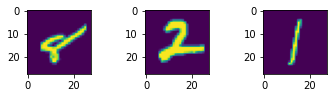

In [4]:
for i in range(3):
  ind = np.random.randint(0, train_images.shape[0])
  plt.subplot(330 + 1 + i)
  plt.imshow(train_images[ind])
  print(f'Label is {train_labels[ind]}')

In [5]:
# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)

(60000, 784)
(10000, 784)


In [6]:
input_size = train_images.shape[1]
# print(input_size)

In [7]:
def test_nn(train_images,
            y_train,
            test_images,
            y_test,
            n_layers: int = 2,
            n1_neuron: int = 64,
            n2_neuron: int = 64,
            optimizer: str = 'adam',
            n_epochs: int = 5,
            batch_size: int = 32,
            validation_split: float = 0.2,
            verbose=True):
  

  # Build the model.

  model = Sequential()
  model.add(Dense(n1_neuron, input_shape=(input_size,), activation='relu'))
  # model.add(Dense(n2_neuron, activation='tanh'))
  # Если хотим хотим увеличить количество слоёв больше двух, то будем добавлять 
  if n_layers > 2: 
    for k in range(n_layers-2):
      model.add(Dense(n2_neuron, activation='tanh'))

  # выходной слой.
  model.add(Dense(10, activation='softmax'))


  # Compile the model.
  model.compile(
  optimizer=optimizer,
  loss='categorical_crossentropy',
  metrics=['accuracy'],
  )

  # Train the model.
  history = model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=n_epochs,
  batch_size=batch_size,
  validation_split=validation_split,
  verbose=verbose
  )

  # Evaluate the model.
  model.evaluate(
  test_images,
  to_categorical(test_labels)
  )

  return history.history

## **Проверка обучения с разным количеством нейронов скрытого слоя**

In [10]:
res_dict={}
x = np.linspace(1, 20, 20)
for n_neurons in [2, 4, 8, 32, 96, 192]:
    res_dict[n_neurons] = test_nn(train_images, train_labels, test_images, test_labels,
                                   n1_neuron=n_neurons,
                                   n2_neuron=None,
                                   n_layers=2,
                                   optimizer='adam',
                                   n_epochs=20,
                                   batch_size=128,
                                   validation_split=0.2,
                                   verbose=False)

313/313 [==============================] - 1s 2ms/step - loss: 0.0897 - accuracy: 0.9739


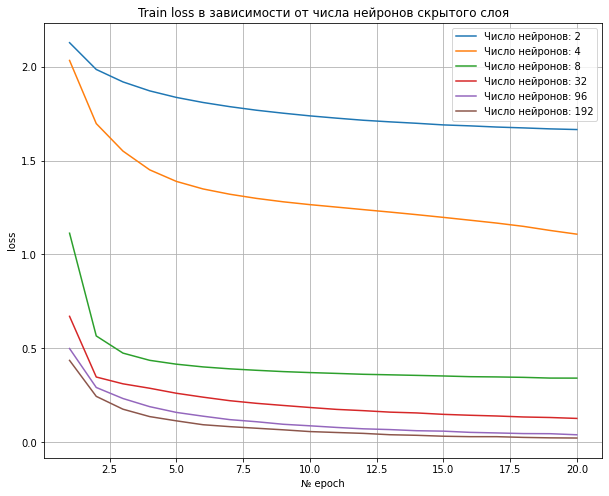

In [13]:
plt.figure(figsize=(10, 8))
for n_neur in res_dict:
        plt.plot(x, res_dict[n_neur]['loss'], label=f'Число нейронов: {n_neur}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('loss')
plt.title('Train loss в зависимости от числа нейронов скрытого слоя')
plt.show()

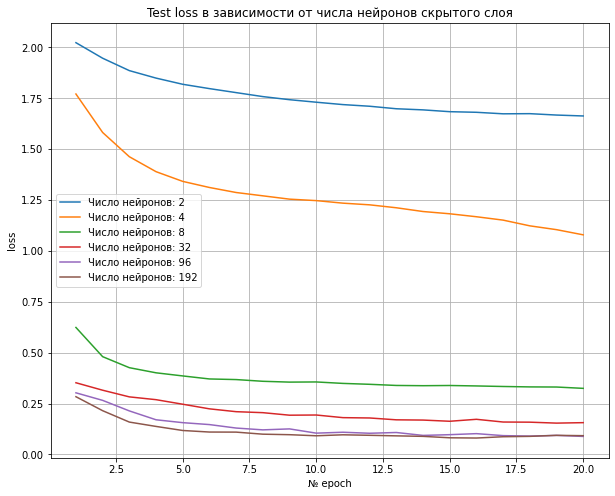

In [14]:
plt.figure(figsize=(10, 8))
for n_neur in res_dict:
        plt.plot(x, res_dict[n_neur]['val_loss'], label=f'Число нейронов: {n_neur}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('loss')
plt.title('Test loss в зависимости от числа нейронов скрытого слоя')
plt.show()

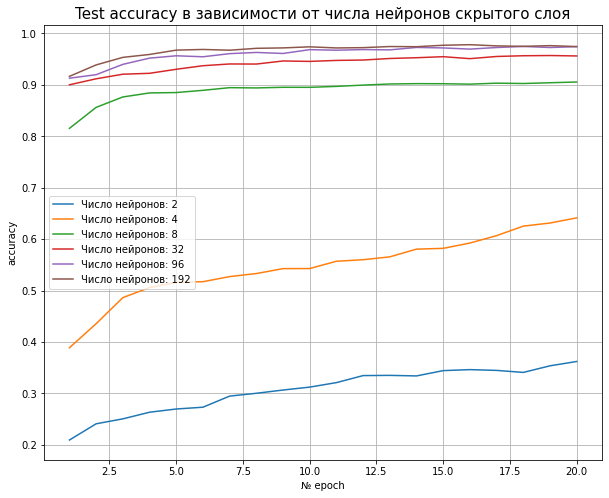

In [16]:
plt.figure(figsize=(10, 8))
for n_neur in res_dict:
        plt.plot(x, res_dict[n_neur]['val_accuracy'], label=f'Число нейронов: {n_neur}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('accuracy')
plt.title('Test accuracy в зависимости от числа нейронов скрытого слоя', size=15)
plt.show()

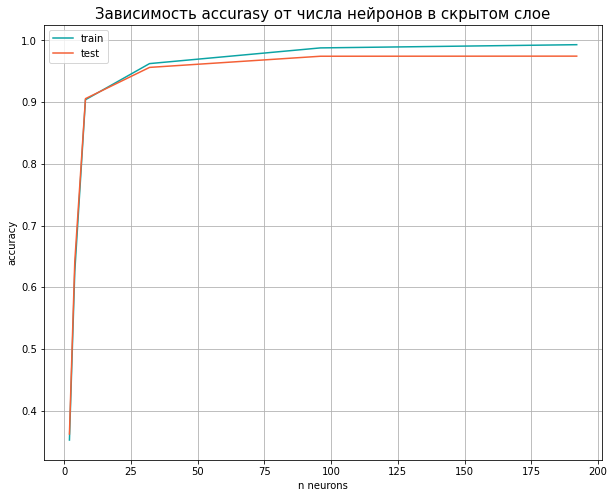

In [17]:
n_n = [2, 4, 8, 32, 96, 192]

res_train = [res_dict[n_neur]['accuracy'][19] for n_neur in res_dict]
res_test = [res_dict[n_neur]['val_accuracy'][19] for n_neur in res_dict]

plt.figure(figsize=(10, 8))
plt.plot(n_n, res_train, label='train', c='#0CA4A5')
plt.plot(n_n, res_test, label='test', c='#F46036')

plt.title('Зависимость accurasy от числа нейронов в скрытом слое', size=15)
plt.grid()
plt.xlabel('n neurons')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Увеличение числа нейронов в скрытом слое двухслойной сети увеличивает качество модели. Впрочем, существует предел улучшения.

## **Провeрка обучения с разным количеством скрытых слоев**

In [20]:
# (2, 3, 5, 10) - кол-во слоев
res_dict_2 = {}
num_layers = (2, 3, 5, 10)
x = np.linspace(1, 20, 20)
for n in num_layers:
    res_dict_2[n] = test_nn(train_images, train_labels, test_images, test_labels,
                                   n1_neuron=32,
                                   n2_neuron=32,
                                   n_layers=n,
                                   optimizer='adam',
                                   n_epochs=20,
                                   batch_size=128,
                                   validation_split=0.2,
                                   verbose=False)

313/313 [==============================] - 1s 2ms/step - loss: 0.1700 - accuracy: 0.9508


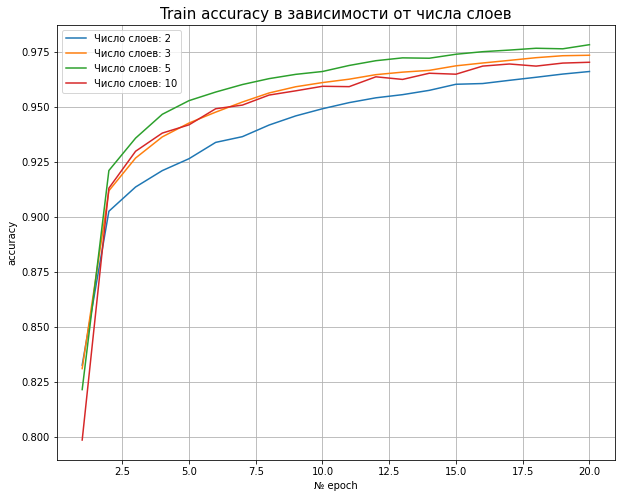

In [21]:
plt.figure(figsize=(10, 8))
for n_layers in res_dict_2:
        plt.plot(x, res_dict_2[n_layers]['accuracy'], label=f'Число слоев: {n_layers}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('accuracy')
plt.title('Train accuracy в зависимости от числа слоев', size=15)
plt.show()

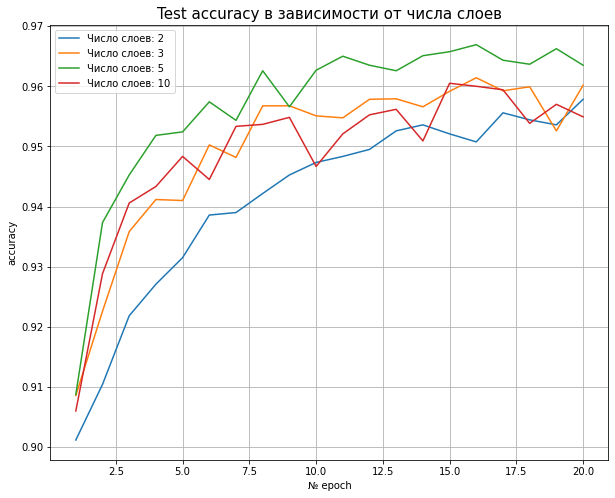

In [22]:
plt.figure(figsize=(10, 8))
for n_layers in res_dict_2:
        plt.plot(x, res_dict_2[n_layers]['val_accuracy'], label=f'Число слоев: {n_layers}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('accuracy')
plt.title('Test accuracy в зависимости от числа слоев',size=15)
plt.show()

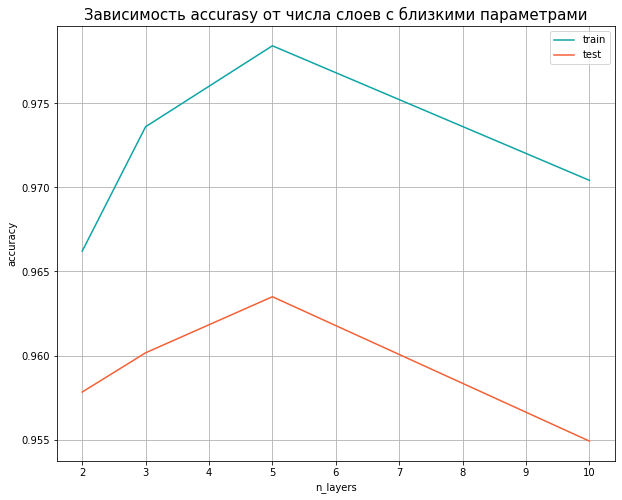

In [23]:
# n_layers = [2, 3, 5, 10]
res_train = [res_dict_2[n_lay]['accuracy'][19] for n_lay in res_dict_2]
res_test = [res_dict_2[n_lay]['val_accuracy'][19] for n_lay in res_dict_2]

plt.figure(figsize=(10, 8))
plt.plot(num_layers, res_train, label='train', c='#0CA4A5')
plt.plot(num_layers, res_test, label='test', c='#F46036')

plt.title('Зависимость accurasy от числа слоев с близкими параметрами', size=15)
plt.grid()
plt.xlabel('n_layers')
plt.ylabel('accuracy')
plt.legend()
plt.show()

При создании слоёв с одинаковыми параметрами лучше всего показала себя сеть с 5 слоями. Впрочем, и 3 и 10 слоёв также показали себя достаточно хорошо.

## Провeрка обучения с разными оптимизаторами
(Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1. Фиксируйте для тренировочного и тестового набора метрики accuracy.)

In [24]:
res_dict_3 = {}
optimizers = ['SGD', 'Adagrad', 'RMSprop', 'Adam', 'Nadam']
x = np.linspace(1, 20, 20)
for optim in optimizers:
    res_dict_3[optim] = test_nn(train_images, train_labels, test_images, test_labels,
                                   n1_neuron=32,
                                   n2_neuron=32,
                                   n_layers=3,
                                   optimizer=optim,
                                   n_epochs=20,
                                   batch_size=128,
                                   validation_split=0.2,
                                   verbose=False)

313/313 [==============================] - 1s 4ms/step - loss: 0.1169 - accuracy: 0.9645


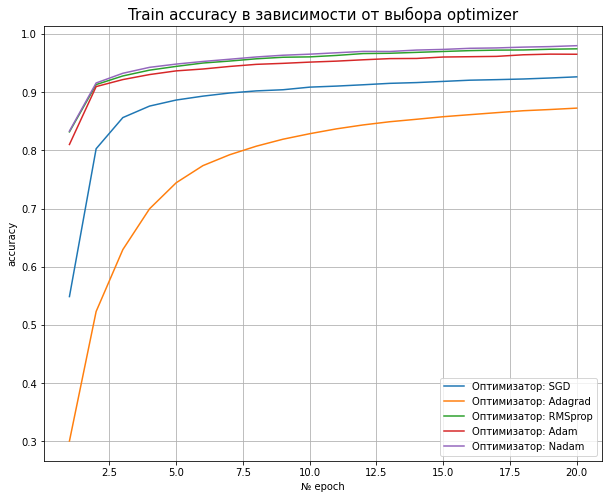

In [25]:
plt.figure(figsize=(10, 8))
for optim in res_dict_3:
        plt.plot(x, res_dict_3[optim]['accuracy'], label=f'Оптимизатор: {optim}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('accuracy')
plt.title('Train accuracy в зависимости от выбора optimizer', size=15)
plt.show()

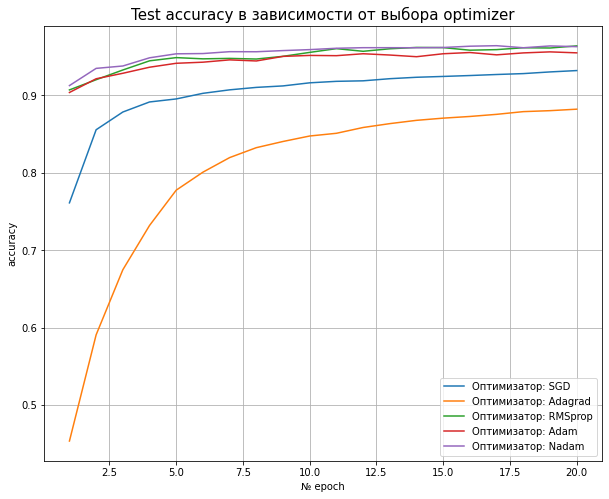

In [26]:
plt.figure(figsize=(10, 8))
for optim in res_dict_3:
        plt.plot(x, res_dict_3[optim]['val_accuracy'], label=f'Оптимизатор: {optim}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('accuracy')
plt.title('Test accuracy в зависимости от выбора optimizer', size=15)
plt.show()

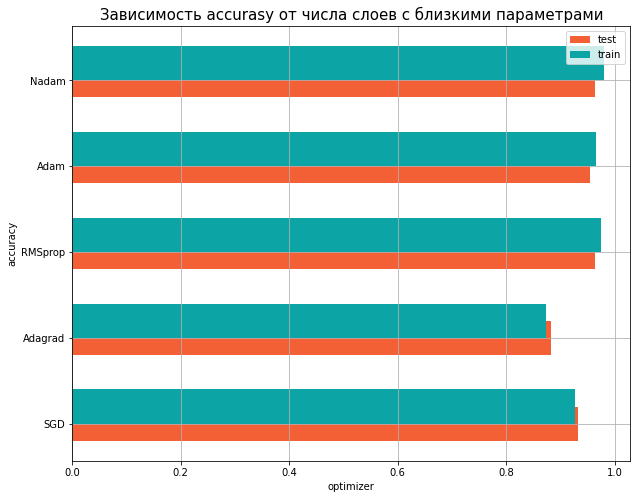

In [27]:
# optimizers = ['SGD', 'Adagrad', 'RMSprop', 'Adam', 'Nadam']
res_train = [res_dict_3[optim]['accuracy'][19] for optim in res_dict_3]
res_test = [res_dict_3[optim]['val_accuracy'][19] for optim in res_dict_3]

plt.figure(figsize=(10, 8))

plt.barh(optimizers, res_test, label='test', color='#F46036', height=0.4)
plt.barh(optimizers, res_train, label='train', color='#0CA4A5', height=0.4, align='edge')

plt.title('Зависимость accurasy от числа слоев с близкими параметрами', size=15)
plt.grid()
plt.xlabel('optimizer')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Хуже всего показали себя оптимизаторы adagrad и sgd. Остальные показали примерно равные результаты.


In [28]:
model_fin = Sequential([
    Dense(96, input_shape=(28 * 28,), activation='tanh'),
    Dense(96, activation='tanh'),
    Dense(10, activation='softmax')
])
model_fin.compile(loss='categorical_crossentropy', 
                optimizer='Nadam', 
                metrics=['accuracy'])

mod = model_fin.fit(train_images, to_categorical(train_labels),
                  epochs=40,
                  batch_size=128, 
                  verbose=0,
                  validation_split=0.2)

mod.history

{'loss': [0.43212151527404785,
  0.21521614491939545,
  0.158854678273201,
  0.12552300095558167,
  0.10564235597848892,
  0.0900416150689125,
  0.07373395562171936,
  0.06507611274719238,
  0.059409160166978836,
  0.050647370517253876,
  0.04740145802497864,
  0.03858492895960808,
  0.035259027034044266,
  0.0319233275949955,
  0.02993016131222248,
  0.025537120178341866,
  0.02556954137980938,
  0.020366592332720757,
  0.0186973474919796,
  0.023796219378709793],
 'accuracy': [0.874916672706604,
  0.9361666440963745,
  0.9523749947547913,
  0.9625416398048401,
  0.9691666960716248,
  0.973312497138977,
  0.9778958559036255,
  0.9803125262260437,
  0.9815624952316284,
  0.9850833415985107,
  0.9850624799728394,
  0.9885833263397217,
  0.9894999861717224,
  0.9901666641235352,
  0.9905624985694885,
  0.9919999837875366,
  0.9918749928474426,
  0.9941041469573975,
  0.9943541884422302,
  0.9921666383743286],
 'val_loss': [0.2424161583185196,
  0.1700420379638672,
  0.14444245398044586,


In [29]:
print(f"Метрика на train: {max(mod.history['accuracy'])}", 
      f"Метрика на test: {max(mod.history['val_accuracy'])}", sep="\n")

Метрика на train: 0.9943541884422302
Метрика на test: 0.9734166860580444


In [30]:
N = 5
y_pred = model_fin.predict(test_images)
y_pred_class = np.argmax(y_pred, axis=1)

313/313 [==============================] - 1s 2ms/step


In [31]:
y_test = to_categorical(test_labels)

In [32]:
y_test_labels = np.argmax(y_test, axis=1)

In [33]:
test_confusion_matrix = confusion_matrix(y_test_labels, y_pred_class)
print(test_confusion_matrix)

[[ 974    0    1    0    1    1    1    1    1    0]
 [   0 1123    1    2    0    2    5    0    2    0]
 [   5    6  991   11    2    2    5    4    5    1]
 [   2    0    3  960    1   33    0    2    5    4]
 [   1    0    4    0  949    3    8    1    3   13]
 [   5    0    1    2    1  871    9    1    2    0]
 [   7    2    1    0    1   13  934    0    0    0]
 [   1    8   11    6    0    3    1  991    2    5]
 [   6    0    2    5    4    9    6    4  934    4]
 [   4    4    3    5    4    9    3   12    6  959]]


In [34]:
print(classification_report(y_test_labels, y_pred_class))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.96      0.97      1032
           3       0.97      0.95      0.96      1010
           4       0.99      0.97      0.98       982
           5       0.92      0.98      0.95       892
           6       0.96      0.97      0.97       958
           7       0.98      0.96      0.97      1028
           8       0.97      0.96      0.97       974
           9       0.97      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



# Задание 2.

Используем набор примеров fashion-MNIST

1) Опишите - какой результат нейросети получен в зависимости от:

* числа нейронов в слое (для 2-х слойной сети),

* числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых параметров).

* фиксируйте для тренировочного и тестового набора метрики accuracy.

In [35]:
from keras.datasets import fashion_mnist

In [106]:
(X_train, y_train_labels), (X_test, y_test_labels) = fashion_mnist.load_data()

print(X_train.shape, X_test.shape)
print(y_train_labels.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,)


In [107]:
X_train.min(), X_train.max()

(0, 255)

In [37]:
classes = {'0': 'T-shirt/top',
           '1': 'Trouser',
           '2': 'Pullover',
           '3': 'Dress',
           '4': 'Coat',
           '5': 'Sandal',
           '6': 'Shirt',
           '7': 'Sneaker',
           '8': 'Bag',
           '9': 'Ankle boot'}

Label is 0
Label is 3
Label is 4


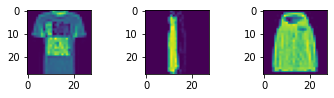

In [38]:
for i in range(3):
  ind = np.random.randint(0, X_train.shape[0])
  plt.subplot(330 + 1 + i)
  plt.imshow(X_train[ind])
  print(f'Label is {y_train_labels[ind]}')

In [108]:
# Normalize the images.
X_train = (X_train / 255.0)
X_test = (X_test / 255.0)

print(X_train.min(), X_train.max())

# Flatten the images.
X_train = X_train.reshape((-1, 784))
X_test = X_test.reshape((-1, 784))

print(X_train.shape) # (60000, 784)
print(X_test.shape)

0.0 1.0
(60000, 784)
(10000, 784)


## **Проверка обучения с разным количеством нейронов скрытого слоя**

In [109]:
res_dict_4={}
x = np.linspace(1, 20, 20)
for n_neurons in [2, 4, 8, 32, 96, 192]:
    res_dict_4[n_neurons] = test_nn(X_train, y_train_labels, X_test, y_test_labels,
                                   n1_neuron=n_neurons,
                                   n2_neuron=None,
                                   n_layers=2,
                                   optimizer='adam',
                                   n_epochs=20,
                                   batch_size=128,
                                   validation_split=0.2,
                                   verbose=False)

313/313 [==============================] - 1s 2ms/step - loss: 2.3663 - accuracy: 0.1045


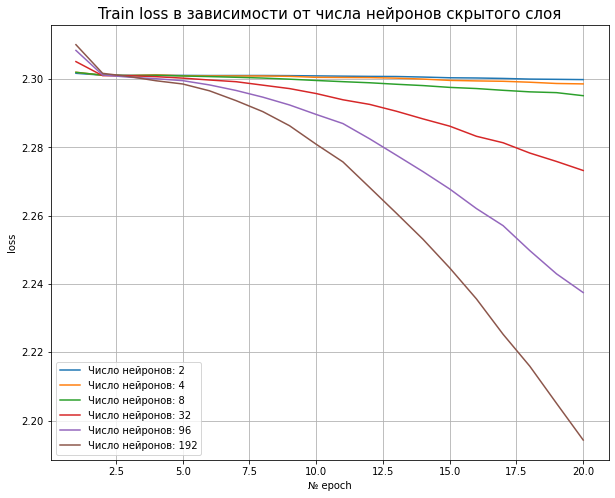

In [110]:
plt.figure(figsize=(10, 8))
for n_neur in res_dict_4:
        plt.plot(x, res_dict_4[n_neur]['loss'], label=f'Число нейронов: {n_neur}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('loss')
plt.title('Train loss в зависимости от числа нейронов скрытого слоя', size=15)
plt.show()

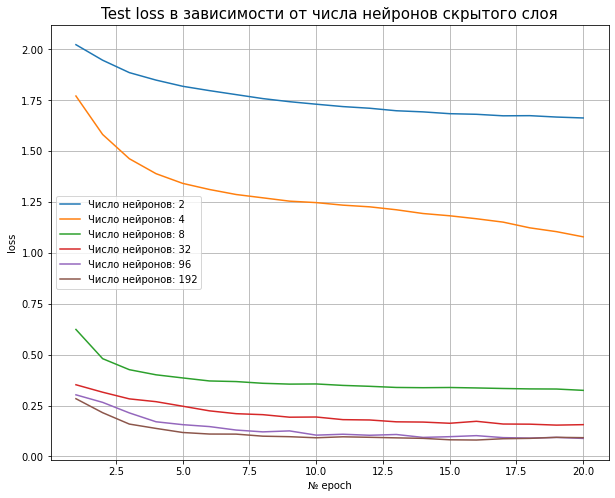

In [97]:
plt.figure(figsize=(10, 8))
for n_neur in res_dict_4:
        plt.plot(x, res_dict[n_neur]['val_loss'], label=f'Число нейронов: {n_neur}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('loss')
plt.title('Test loss в зависимости от числа нейронов скрытого слоя', size=15)
plt.show()

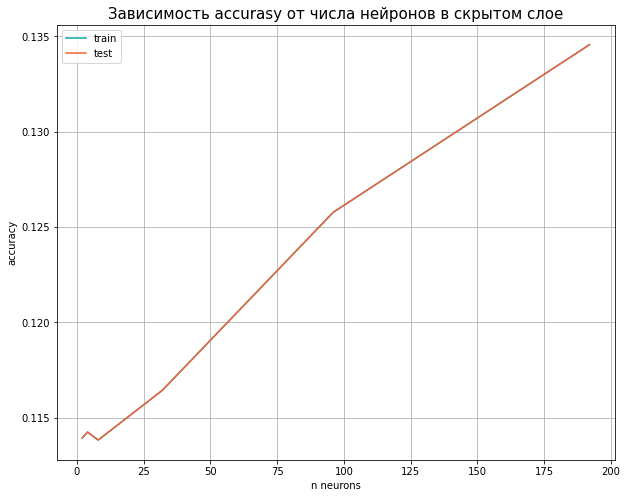

In [68]:
n_n = [2, 4, 8, 32, 96, 192]

res_train = [res_dict_4[n_neur]['accuracy'][10] for n_neur in res_dict_4]
res_test = [res_dict_4[n_neur]['val_accuracy'][10] for n_neur in res_dict_4]

plt.figure(figsize=(10, 8))
plt.plot(n_n, res_train, label='train', c='#0CA4A5')
plt.plot(n_n, res_test, label='test', c='#F46036')

plt.title('Зависимость accurasy от числа нейронов в скрытом слое', size=15)
plt.grid()
plt.xlabel('n neurons')
plt.ylabel('accuracy')
plt.legend()
plt.show()

## **Проверка обучения с разным количеством нейронов скрытого слоя**

In [44]:
# (2, 3, 5, 10) - кол-во слоев
res_dict_5 = {}
num_layers = (2, 3, 5, 10)
x = np.linspace(1, 20, 20)
for n in num_layers:
    res_dict_5[n] = test_nn(X_train, y_train_labels, X_test, y_test_labels,
                                   n1_neuron=32,
                                   n2_neuron=32,
                                   n_layers=n,
                                   optimizer='adam',
                                   n_epochs=20,
                                   batch_size=128,
                                   validation_split=0.2,
                                   verbose=False)

313/313 [==============================] - 1s 2ms/step - loss: 2.3039 - accuracy: 0.1112


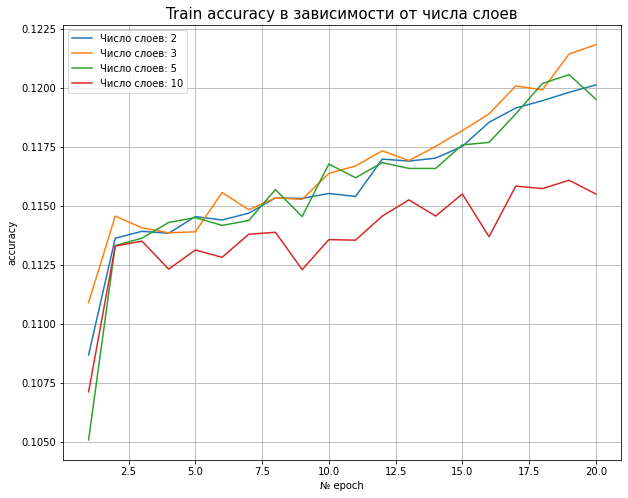

In [45]:
plt.figure(figsize=(10, 8))
for n_layers in res_dict_5:
        plt.plot(x, res_dict_5[n_layers]['accuracy'], label=f'Число слоев: {n_layers}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('accuracy')
plt.title('Train accuracy в зависимости от числа слоев', size=15)
plt.show()

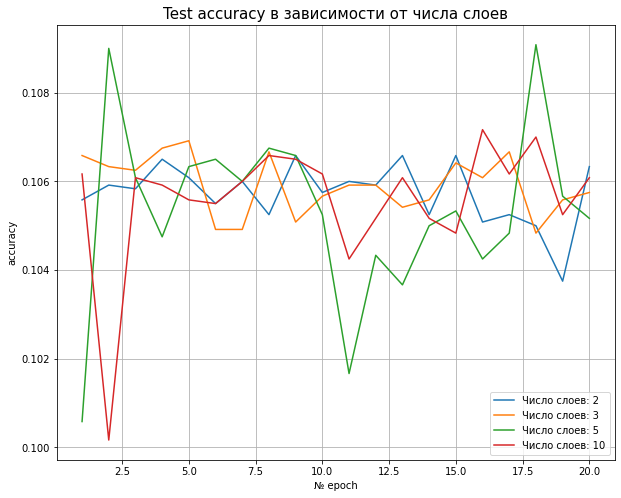

In [46]:
plt.figure(figsize=(10, 8))
for n_layers in res_dict_5:
        plt.plot(x, res_dict_5[n_layers]['val_accuracy'], label=f'Число слоев: {n_layers}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('accuracy')
plt.title('Test accuracy в зависимости от числа слоев', size=15)
plt.show()

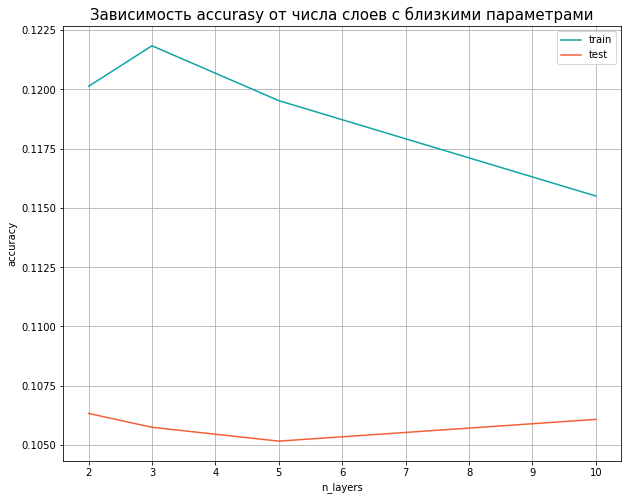

In [47]:
res_train = [res_dict_5[n_lay]['accuracy'][19] for n_lay in res_dict_5]
res_test = [res_dict_5[n_lay]['val_accuracy'][19] for n_lay in res_dict_5]

plt.figure(figsize=(10, 8))
plt.plot(num_layers, res_train, label='train', c='#0CA4A5')
plt.plot(num_layers, res_test, label='test', c='#F46036')

plt.title('Зависимость accurasy от числа слоев с близкими параметрами', size=15)
plt.grid()
plt.xlabel('n_layers')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Лучше всего показал вариант с тремя слоями.

## Провeрка обучения с разными оптимизаторами

2) Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1. Фиксируйте для тренировочного и тестового набора метрики accuracy.

In [48]:
res_dict_6 = {}
optimizers = ['SGD', 'Adagrad', 'RMSprop', 'Adam', 'Nadam']
x = np.linspace(1, 20, 20)
for optim in optimizers:
    res_dict_6[optim] = test_nn(X_train, y_train_labels, X_test, y_test_labels,
                                   n1_neuron=32,
                                   n2_neuron=32,
                                   n_layers=3,
                                   optimizer=optim,
                                   n_epochs=20,
                                   batch_size=128,
                                   validation_split=0.2,
                                   verbose=False)

313/313 [==============================] - 1s 2ms/step - loss: 2.3129 - accuracy: 0.1133


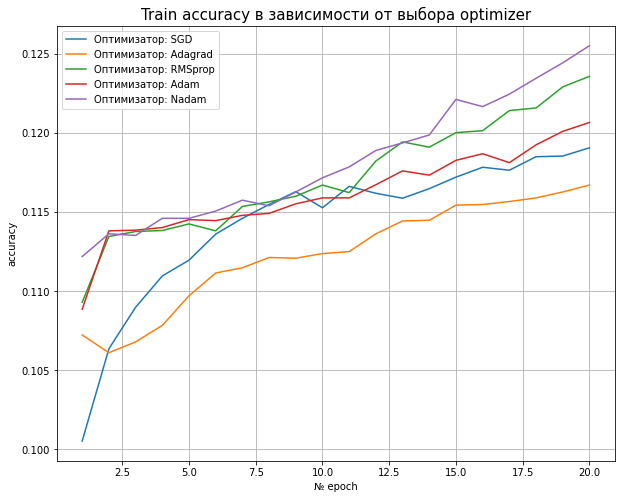

In [49]:
plt.figure(figsize=(10, 8))
for optim in res_dict_6:
        plt.plot(x, res_dict_6[optim]['accuracy'], label=f'Оптимизатор: {optim}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('accuracy')
plt.title('Train accuracy в зависимости от выбора optimizer', size=15)
plt.show()

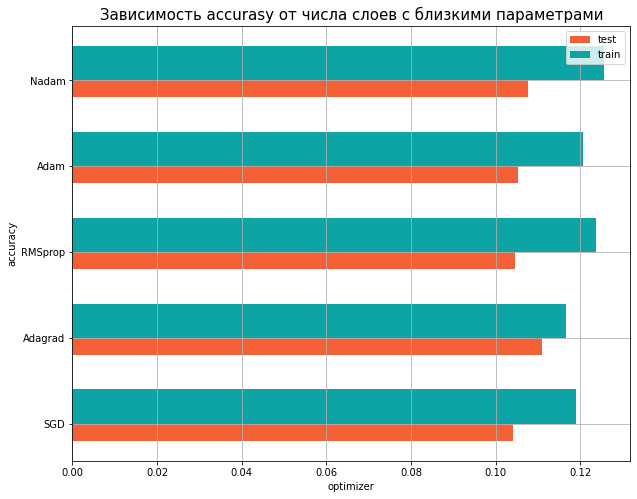

In [50]:
# optimizers = ['SGD', 'Adagrad', 'RMSprop', 'Adam', 'Nadam']
res_train = [res_dict_6[optim]['accuracy'][19] for optim in res_dict_6]
res_test = [res_dict_6[optim]['val_accuracy'][19] for optim in res_dict_6]

plt.figure(figsize=(10, 8))

plt.barh(optimizers, res_test, label='test', color='#F46036', height=0.4)
plt.barh(optimizers, res_train, label='train', color='#0CA4A5', height=0.4, align='edge')

plt.title('Зависимость accurasy от числа слоев с близкими параметрами', size=15)
plt.grid()
plt.xlabel('optimizer')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Лучше всего показал оптимизатор Nadam

## Вывод по улучшению

3) Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе?

Увеличение числа нейронов, выбор оптимизатора, увеличение числа эпох. Также существует зависимость от размера батчей.

## Матрица

4) Для одного варианта сети сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота, точность).

In [51]:
model_fin_2 = Sequential([
    Dense(96, input_shape=(28 * 28,), activation='tanh'),
    Dense(96, activation='tanh'),
    Dense(10, activation='softmax')
])
model_fin_2.compile(loss='categorical_crossentropy', 
                optimizer='Adam', 
                metrics=['accuracy'])

mod_2 = model_fin_2.fit(X_train, to_categorical(y_train_labels),
                  epochs=20,
                  batch_size=128, 
                  verbose=0,
                  validation_split=0.2)

mod_2.history

{'loss': [0.5523853898048401,
  0.3981395959854126,
  0.3638951778411865,
  0.3371323049068451,
  0.31804242730140686,
  0.3017214238643646,
  0.28470340371131897,
  0.2746391296386719,
  0.267129510641098,
  0.25348737835884094,
  0.24215508997440338,
  0.23211239278316498,
  0.22576113045215607,
  0.22022965550422668,
  0.20889684557914734,
  0.20021352171897888,
  0.1956733763217926,
  0.1920238882303238,
  0.17830422520637512,
  0.17710565030574799],
 'accuracy': [0.8051666617393494,
  0.8567500114440918,
  0.8680833578109741,
  0.8776458501815796,
  0.8848541378974915,
  0.8905624747276306,
  0.8964375257492065,
  0.8991041779518127,
  0.9023958444595337,
  0.9058541655540466,
  0.9110833406448364,
  0.9150624871253967,
  0.9167916774749756,
  0.9194375276565552,
  0.9237499833106995,
  0.9269999861717224,
  0.9277499914169312,
  0.9290000200271606,
  0.9359999895095825,
  0.9348124861717224],
 'val_loss': [0.4402005970478058,
  0.39910179376602173,
  0.37492358684539795,
  0.3683

In [52]:
print(f"Метрика на train: {max(mod_2.history['accuracy'])}", 
      f"Метрика на test: {max(mod_2.history['val_accuracy'])}", sep="\n")

Метрика на train: 0.9359999895095825
Метрика на test: 0.8916666507720947


In [58]:
N = 5
y_pred_2 = model_fin_2.predict(X_test)
y_pred_class_2 = np.argmax(y_pred_2, axis=1)

313/313 [==============================] - 1s 4ms/step


In [59]:
y_test_2 = to_categorical(y_test_labels)

In [60]:
y_test_labels_2 = np.argmax(y_test_2, axis=1)

In [61]:
test_confusion_matrix = confusion_matrix(y_test_labels_2, y_pred_class_2)
print(test_confusion_matrix)

[[846   0  12  19   5   1 107   0   9   1]
 [  5 965   1  24   1   0   4   0   0   0]
 [ 23   0 809  13  58   0  90   0   7   0]
 [ 36   8  10 885  26   0  30   0   5   0]
 [  2   1  99  33 778   0  82   0   5   0]
 [  1   0   0   1   0 927   0  50   2  19]
 [133   0  65  28  50   0 712   0  12   0]
 [  0   0   0   0   0   5   0 982   0  13]
 [  6   1   3   5   1   2   7   6 969   0]
 [  0   0   0   0   0   6   1  73   0 920]]


In [62]:
print(classification_report(y_test_labels_2, y_pred_class_2))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82      1000
           1       0.99      0.96      0.98      1000
           2       0.81      0.81      0.81      1000
           3       0.88      0.89      0.88      1000
           4       0.85      0.78      0.81      1000
           5       0.99      0.93      0.96      1000
           6       0.69      0.71      0.70      1000
           7       0.88      0.98      0.93      1000
           8       0.96      0.97      0.96      1000
           9       0.97      0.92      0.94      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [63]:
classification_report(y_test_labels_2, y_pred_class_2, 
                      output_dict=True, 
                      target_names=classes.values())

{'T-shirt/top': {'precision': 0.8041825095057035,
  'recall': 0.846,
  'f1-score': 0.8245614035087719,
  'support': 1000},
 'Trouser': {'precision': 0.9897435897435898,
  'recall': 0.965,
  'f1-score': 0.9772151898734178,
  'support': 1000},
 'Pullover': {'precision': 0.8098098098098098,
  'recall': 0.809,
  'f1-score': 0.8094047023511757,
  'support': 1000},
 'Dress': {'precision': 0.8779761904761905,
  'recall': 0.885,
  'f1-score': 0.8814741035856574,
  'support': 1000},
 'Coat': {'precision': 0.8465723612622416,
  'recall': 0.778,
  'f1-score': 0.8108389786347057,
  'support': 1000},
 'Sandal': {'precision': 0.9851222104144527,
  'recall': 0.927,
  'f1-score': 0.9551777434312211,
  'support': 1000},
 'Shirt': {'precision': 0.6892545982575025,
  'recall': 0.712,
  'f1-score': 0.7004426955238563,
  'support': 1000},
 'Sneaker': {'precision': 0.8838883888388839,
  'recall': 0.982,
  'f1-score': 0.9303647560397916,
  'support': 1000},
 'Bag': {'precision': 0.9603567888999008,
  'recall